# NLP(TUKEY)

# Luis Melendez

CARGAR TXT

In [5]:
import pandas as pd

with open('test.txt', 'r', encoding='utf-8') as f:
    lineas = f.readlines()
data = [line.strip().split(';') for line in lineas if ';' in line]
df = pd.DataFrame(data, columns=['Comentario', 'Emocion'])
df

,Comentario,Emocion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


# Funciones para normalizar

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def minusculas(texto):
    res = ""
    for x in range(len(texto)):
        if texto[x] >= "A" and texto[x] <= "Z":
            res += chr(ord(texto[x])+32)
        else:
            res += texto[x]
    return res

def quitarPuntuacion(texto):
    res = ""
    for x in range(len(texto)):
        if texto[x].isalnum() or texto[x].isspace():
            res += texto[x]
    return res

def tokens(texto):
    tokens = []
    palabra = ""
    for x in range(len(texto)):
        if texto[x] != " ":
            palabra += texto[x]
        else:
            if len(palabra) >= 1:
                tokens.append(palabra)
                palabra = ""
    if len(palabra) >= 1:
        tokens.append(palabra)
    return tokens

def eliminarStopwprds(texto):
    temp = []
    stopWords = set(stopwords.words('english'))
    for x in texto:
        if not x in stopWords:
            temp.append(x)
    return temp
            
def normalizar(texto):
    texto = minusculas(texto)
    texto = quitarPuntuacion(texto)
    texto = tokens(texto)
    texto = eliminarStopwprds(texto)
    return texto

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luigu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Normalizar

In [7]:
df["Tokens"] = df["Comentario"].apply(normalizar)
df["Comentario normalizado"] = df["Tokens"].apply(lambda x: ' '.join(x))
df

,Comentario,Emocion,Tokens,Comentario normalizado
0,im feeling rather rotten so im not very ambiti...,sadness,"[im, feeling, rather, rotten, im, ambitious, r...",im feeling rather rotten im ambitious right
1,im updating my blog because i feel shitty,sadness,"[im, updating, blog, feel, shitty]",im updating blog feel shitty
2,i never make her separate from me because i do...,sadness,"[never, make, separate, ever, want, feel, like...",never make separate ever want feel like ashamed
3,i left with my bouquet of red and yellow tulip...,joy,"[left, bouquet, red, yellow, tulips, arm, feel...",left bouquet red yellow tulips arm feeling sli...
4,i was feeling a little vain when i did this one,sadness,"[feeling, little, vain, one]",feeling little vain one
...,...,...,...,...
1995,i just keep feeling like someone is being unki...,anger,"[keep, feeling, like, someone, unkind, wrong, ...",keep feeling like someone unkind wrong think g...
1996,im feeling a little cranky negative after this...,anger,"[im, feeling, little, cranky, negative, doctor...",im feeling little cranky negative doctors appo...
1997,i feel that i am useful to my people and that ...,joy,"[feel, useful, people, gives, great, feeling, ...",feel useful people gives great feeling achieve...
1998,im feeling more comfortable with derby i feel ...,joy,"[im, feeling, comfortable, derby, feel, though...",im feeling comfortable derby feel though start...


# Representacion numerica

In [8]:
import numpy as np
import math
def obtenerVocabulario(tokens):
    voc = set()
    for x in tokens:
        voc.update(x)
    return list(voc)
    
def BoW(tokens,vocab):
    vector = [0] * len(vocab)
    for word in tokens:
        if word in vocab:
            idx = vocab.index(word)
            vector[idx] += 1
    return vector
def tf_idf(tokens, vocab):
    no_docs = len(tokens)

    idf = {}
    for word in vocab:
        n_t = sum(1 for document in tokens if word in document)
        idf[word] = math.log(no_docs / (1 + n_t))

    tf_idf_matrix = []
    for doc in tokens:
        doc_len = len(doc)
        tf_idf_vector = []
        for word in vocab:
            tf = doc.count(word) / doc_len if doc_len > 0 else 0
            tf_idf_val = tf * idf[word]
            tf_idf_vector.append(tf_idf_val)
        tf_idf_matrix.append(tf_idf_vector) 
    return np.array(tf_idf_matrix)



voc = obtenerVocabulario(df["Tokens"])
vectorBoW = []
for t in df["Tokens"]:
    vector = BoW(t, voc)
    vectorBoW.append(vector)

tokens = df["Tokens"].tolist()
tfidf_matrix = tf_idf(tokens, voc)

# Ejemplo de Representación numérica usando BoW o TF-IDF con la primer fila

In [9]:
print(tfidf_matrix[0])
print(vectorBoW[0])

[0. 0. 0. ... 0. 0. 0.]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Agrupa cada emocion con una lista de palabras correspondiente

In [10]:
grupos = df.groupby("Emocion")["Tokens"].apply(lambda x: sum(x, []))
print(grupos)

Emocion
anger       [felt, anger, end, telephone, call, jest, feel...
fear        [cant, walk, shop, anywhere, feel, uncomfortab...
joy         [left, bouquet, red, yellow, tulips, arm, feel...
love        [find, odd, position, feeling, supportive, fee...
sadness     [im, feeling, rather, rotten, im, ambitious, r...
surprise    [feel, little, stunned, imagine, folks, workin...
Name: Tokens, dtype: object


# Palabras con mayor peso en cada emocion

In [11]:
listG = grupos.tolist()
vocab1 = obtenerVocabulario(listG)
vectores = [BoW(doc, vocab1) for doc in listG]
tfidf = tf_idf(listG, vocab1)
for i, emocion in enumerate(grupos.index):
    pesos = tfidf[i]
    top_indices = np.argsort(pesos)[::-1][:10]
    print(f"Palabras más representativas en '{emocion}': \n")
    print([vocab1[j] for j in top_indices])


Palabras más representativas en 'anger': 

['greedy', 'insulted', 'stubborn', 'bitchy', 'irritable', 'bitter', 'rushed', 'impatient', 'cranky', 'bothered']
Palabras más representativas en 'fear': 

['pressured', 'restless', 'shy', 'doubtful', 'afraid', 'uncertain', 'intimidated', 'shaky', 'suspicious', 'fearful']
Palabras más representativas en 'joy': 

['perfect', 'acceptable', 'determined', 'virtuous', 'valued', 'honoured', 'relaxed', 'energetic', 'productive', 'joyful']
Palabras más representativas en 'love': 

['tender', 'gentle', 'sympathetic', 'naughty', 'romantic', 'delicate', 'loyal', 'supportive', 'longing', 'passionate']
Palabras más representativas en 'sadness': 

['dull', 'embarrassed', 'lonely', 'ugly', 'ashamed', 'defeated', 'humiliated', 'homesick', 'unwelcome', 'awful']
Palabras más representativas en 'surprise': 

['curious', 'strange', 'shocked', 'handed', 'amazed', 'dazed', 'age', 'contractions', 'feng', 'cents']


# Palabras compartidas

In [12]:
palabras = []

for x in vocab1:
    conteo = sum(x in grupos[emocion] for emocion in grupos.index)
    if conteo >= 2:
        palabras.append(x)

print(palabras)

['wants', 'everyone', 'matter', 'deserved', 'mental', 'thanks', 'experience', 'probably', 'gracious', 'know', 'watching', 'toes', 'give', 'advanced', 'yellow', 'return', 'expected', 'cannot', 'bf', 'hurts', 'legs', 'case', 'facebook', 'running', 'current', 'hellip', 'finish', 'response', 'impossible', 'steal', 'needs', 'various', 'wake', 'led', 'forgot', 'resolutions', 'meals', 'couple', 'hence', 'pictures', 'even', 'absolutely', 'hear', 'process', 'tv', 'hopeful', 'forever', 'excuse', 'excited', 'upset', 'older', 'baking', 'got', 'equal', 'girl', 'coming', 'accepted', 'listen', 'best', 'cook', 'yesterday', 'intelligence', 'sure', 'exist', 'raw', 'doors', 'whilst', 'words', 'opened', 'game', 'kindness', 'read', 'childhood', 'else', 'burden', 'fear', 'something', 'jokes', 'claudia', 'centered', 'makeup', 'step', 'send', 'mislead', 'want', 'boss', 'moved', 'success', 'guitar', 'obviously', 'past', 'behind', 'able', 'atm', 'customers', 'playing', 'word', 'tuesday', 'little', 'lack', 'agit

# Palabras con diferente significado  
Si la misma palabra tiene diferente peso pero aparece en varias emociones se considera que tienen diferente significado

In [18]:
important_words = {}
min_tf_idf = 0.01           
relative_difference = 2     

emociones = list(grupos.index) 

for i in range(len(vocab1)):  
    palabra = vocab1[i]
    pesos = [tfidf[e][i] for e in range(len(emociones))]  
    max_valor = max(pesos)
    idx_max = pesos.index(max_valor)
    emocion_max = emociones[idx_max]

    if max_valor < min_tf_idf:
        continue  

    suma_otros = sum(pesos) - max_valor
    promedio_otros = suma_otros / (len(pesos) - 1) if len(pesos) > 1 else 0

    if promedio_otros > 0 and (max_valor / promedio_otros >= relative_difference):
        important_words[palabra] = emocion_max


for palabra, emocion in important_words.items():
    print(f"'{palabra} en  '{emocion}")

'curious en  'surprise
'strange en  'surprise


# Palabras mas frecuentes


Top 15 palabras más frecuentes:
feel: 1394 veces
feeling: 646 veces
like: 373 veces
im: 310 veces
really: 118 veces
know: 102 veces
time: 100 veces
get: 97 veces
people: 96 veces
little: 95 veces
one: 84 veces
even: 79 veces
would: 75 veces
ive: 73 veces
want: 72 veces


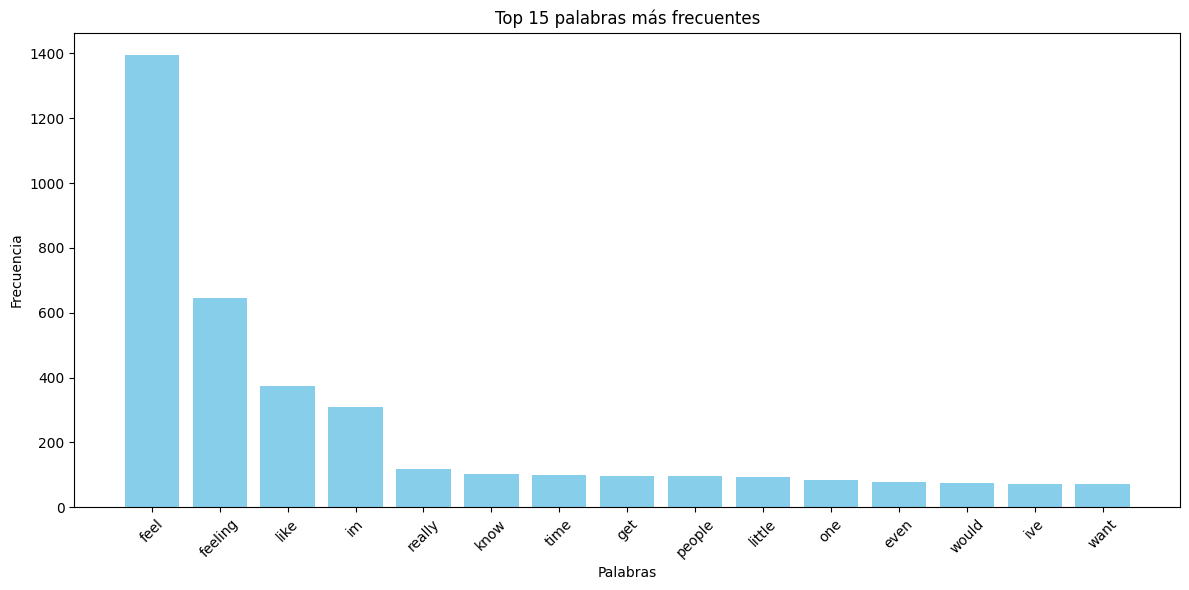

In [14]:
import matplotlib.pyplot as plt

tokensT = df["Tokens"].tolist()
frecuencia = {}
for x in tokensT:
    for y in x:
        if y in frecuencia:
            frecuencia[y] += 1
        else:
            frecuencia[y] = 1


ordenadas = sorted(frecuencia.items(), key=lambda x: -x[1])

print("\nTop 15 palabras más frecuentes:")
for i in range(15):
    palabra, freq = ordenadas[i]
    print(f"{palabra}: {freq} veces")



palabras = ['feel', 'feeling', 'like', 'im', 'really', 'know', 'time', 'get', 'people', 
            'little', 'one', 'even', 'would', 'ive', 'want']
frecuencias = [1394, 646, 373, 310, 118, 102, 100, 97, 96, 95, 84, 79, 75, 73, 72]

plt.figure(figsize=(12,6))
plt.bar(palabras, frecuencias, color='skyblue')
plt.title('Top 15 palabras más frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  
plt.tight_layout()       
plt.show()

# longitud promedio de las oraciones

sadness: 9.26 palabras por oración
joy: 9.27 palabras por oración
fear: 8.86 palabras por oración
anger: 9.55 palabras por oración
love: 9.74 palabras por oración
surprise: 9.39 palabras por oración


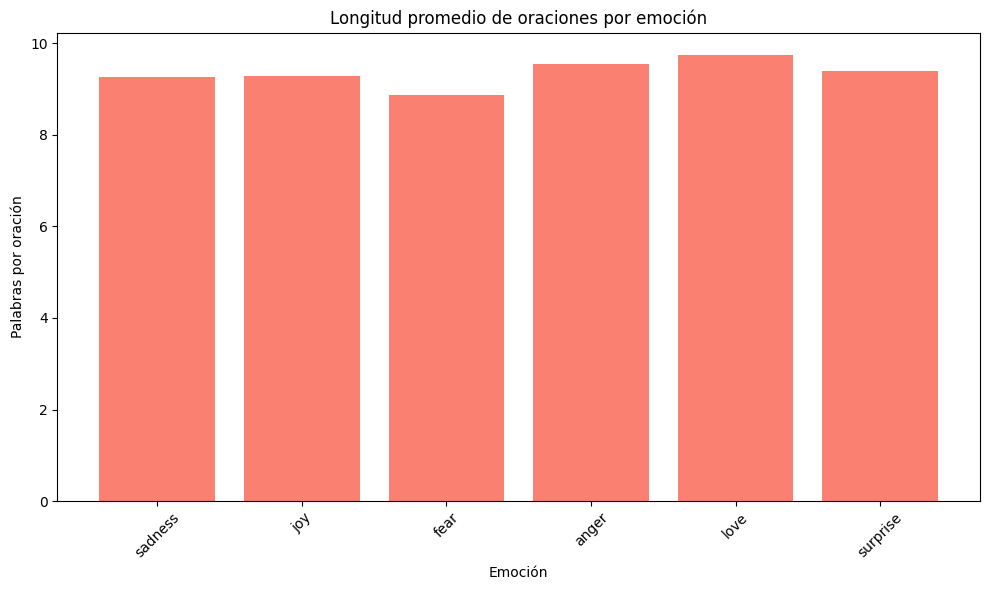

In [19]:
emociones = df["Emocion"].tolist()
tokens_por_oracion = df["Tokens"].tolist()

sumaL = {}
conteo = {}


for i in range(len(tokens_por_oracion)):
    emocion = emociones[i]
    longitud = len(tokens_por_oracion[i])

    if emocion in sumaL:
        sumaL[emocion] += longitud
        conteo[emocion] += 1
    else:
        sumaL[emocion] = longitud
        conteo[emocion] = 1

for emocion in sumaL:
    promedio = sumaL[emocion] / conteo[emocion]
    print(f"{emocion}: {promedio:.2f} palabras por oración")
import matplotlib.pyplot as plt

# Calcular promedios
promedios = {emocion: sumaL[emocion]/conteo[emocion] for emocion in sumaL}

# Preparar datos para graficar
emociones = list(promedios.keys())
longitudes = list(promedios.values())

# Crear gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(emociones, longitudes, color='salmon')
plt.title('Longitud promedio de oraciones por emoción')
plt.xlabel('Emoción')
plt.ylabel('Palabras por oración')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Palabras exclusivas de cada clase


anger (431 palabras): ['piddled', 'fiance', 'pre', 'dhawan', 'predator', 'emo', 'avoided', 'barrage', 'insincere', 'exexbf', 'faiting', 'pool', 'dangerous', 'severe', 'eighty', 'doctors', 'smooth', 'unresolved', 'resulting', 'shattered', 'wnat', 'decent', 'followers', 'victim', 'realistic', 'mere', 'ji', 'gnawing', 'tip', 'articulacy', 'pe', 'enact', 'catching', 'wreaking', 'relate', 'stops', 'patiently', 'vicious', 'minded', 'cooped', 'badminton', 'prebook', 'session', 'pals', 'pity', 'tacky', 'compassion', 'thoughtful', 'exams', 'urine', 'tolerating', 'chilli', 'assimilated', 'comparison', 'stella', 'proper', 'doorstep', 'pavement', 'thirty', 'picky', 'coheed', 'accustomed', 'squeals', 'ingorant', 'coins', 'lothaire', 'argue', 'impatient', 'elevate', 'destroying', 'souless', 'yatsura', 'rational', 'abit', 'contemplating', 'hens', 'courts', 'havoc', 'powerless', 'celebration', 'remark', 'rawr', 'tart', 'lying', 'attack', 'fumble', 'greedy', 'kueh', 'purse', 'unconditional', 'alien', 

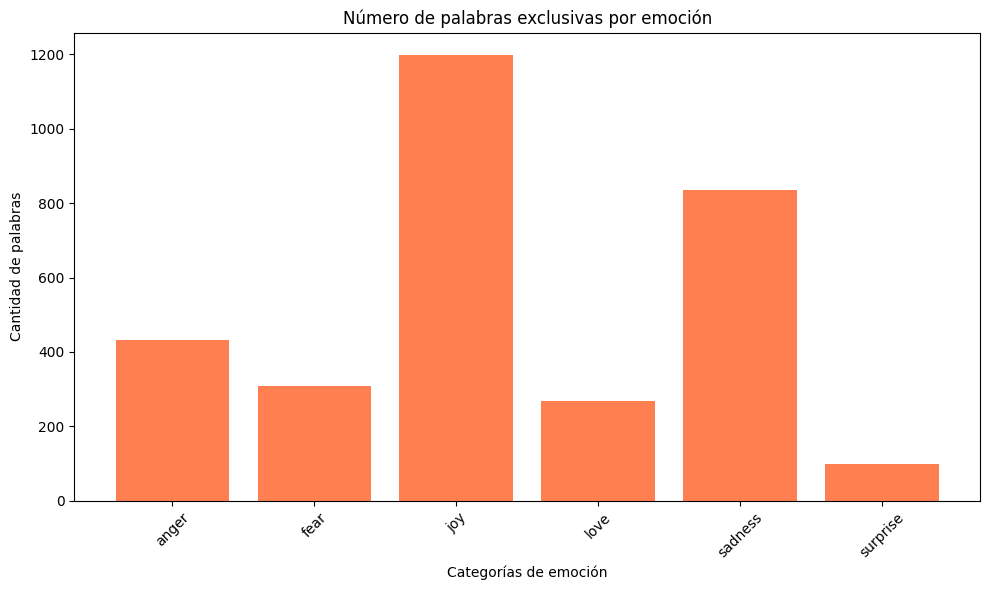

In [22]:
import matplotlib.pyplot as plt

emociones = list(grupos.index)
palabras_por_emocion = {}

# Crear listas de palabras por emoción
for emo in emociones:
    palabras = grupos[emo]  
    palabras_por_emocion[emo] = list(set(palabras))  


exclusivas_por_emocion = {}

for emo in emociones:
    propias = palabras_por_emocion[emo]
    otras = []
    for otra_emo in emociones:
        if otra_emo != emo:
            otras += palabras_por_emocion[otra_emo]
    
    exclusivas = [p for p in propias if p not in otras]
    exclusivas_por_emocion[emo] = len(exclusivas)
    print(f"\n{emo} ({len(exclusivas)} palabras): {exclusivas}")

categorias = list(exclusivas_por_emocion.keys())
valores = list(exclusivas_por_emocion.values())

plt.figure(figsize=(10,6))
plt.bar(categorias, valores, color='coral')
plt.title('Número de palabras exclusivas por emoción')
plt.xlabel('Categorías de emoción')
plt.ylabel('Cantidad de palabras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Concluciones

anger: 
Las palabras con mayor peso fueron:
['greedy', 'insulted', 'stubborn', 'rushed', 'impatient', 'cranky', 'irritable', 'bitter', 'bitchy', 'bothered']
Describen las cualidades de una persona frustrada, podemos decir que los comentarios etiquetados como anger suelen estar relacionados con la frustracion

fear: 
Las palabras con mayor peso fueron:
['pressured', 'restless', 'shy', 'doubtful', 'afraid', 'suspicious', 'uncertain', 'intimidated', 'shaky', 'distressed']
Describen a una persona con baja autoestima, o personas intimidadas

joy: 
Las palabras con mayor peso fueron:
['perfect', 'acceptable', 'virtuous', 'valued', 'determined', 'honoured', 'relaxed', 'energetic', 'pleasant', 'worthwhile']
Las palabras parecen ser cualidades de algun producto que es aceptado por las personas, son cualidades de una persona que puede alcanzar el exito facilmente

love: 
Las palabras con mayor peso fueron:
['tender', 'gentle', 'sympathetic', 'romantic', 'naughty', 'longing', 'supportive', 'delicate', 'loyal', 'supporting']
Las palabras parecen ser cualidades que se busca en una persona cuando se trata de relacionarse de manera amorosa o amistosa

sadness: 
Las palabras con mayor peso fueron:
['dull', 'embarrassed', 'lonely', 'ashamed', 'ugly', 'defeated', 'humiliated', 'unwelcome', 'homesick', 'awful']
Parecen describir algun tipo de fracaso o cualidades que son negativas 

surprise: 
Las palabras con mayor peso fueron:
['strange', 'curious', 'shocked', 'handed', 'amazed', 'dazed', 'contractions', 'ludicrous', 'feng', 'age']
Las palabras tienen que ver con algo nuevo y parece ser que es algo asobroso o que deja aturdido a las personas

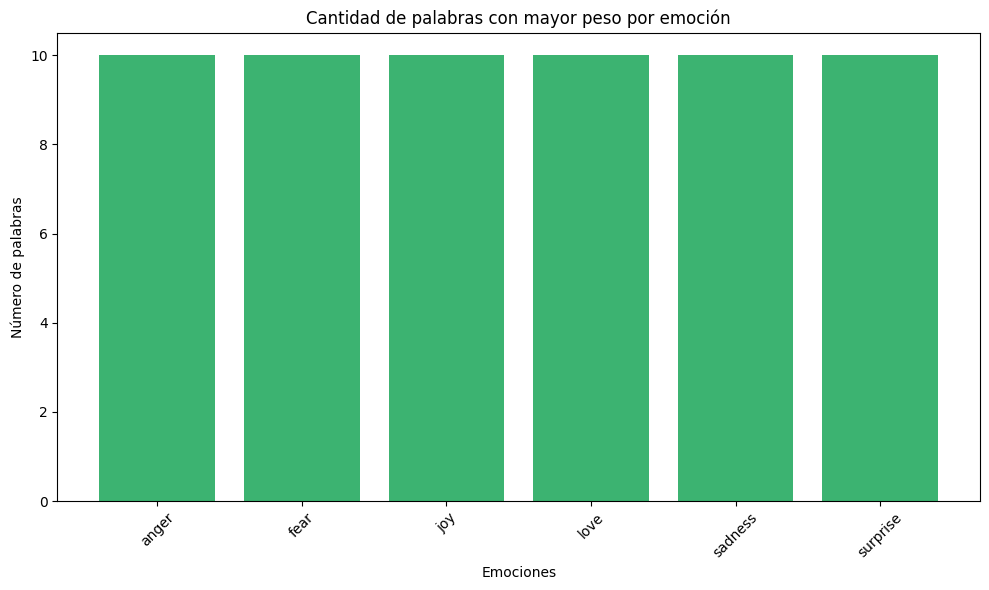

In [23]:
import matplotlib.pyplot as plt


palabras_exclusivas = {
    "anger": 10,
    "fear": 10,
    "joy": 10,
    "love": 10,
    "sadness": 10,
    "surprise": 10
}

emociones = list(palabras_exclusivas.keys())
cantidades = list(palabras_exclusivas.values())

plt.figure(figsize=(10,6))
plt.bar(emociones, cantidades, color='mediumseagreen')
plt.title('Cantidad de palabras con mayor peso por emoción')
plt.xlabel('Emociones')
plt.ylabel('Número de palabras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
